In [30]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
import warnings

warnings.simplefilter("ignore")

In [31]:
#Read Fish marketing data
df = pd.read_csv("../input/fish-market/Fish.csv")

In [32]:
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [33]:
df.tail(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [34]:
#Basic Statical information
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Cleaning Data

In [35]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.9+ KB


# Cleaning outlier data from "Weight" column with IQR

In [36]:
q1_w = df['Weight'].quantile(0.25)
q3_w = df['Weight'].quantile(0.75)
iqr = q3_w - q1_w

for i in df.index:
    if df.loc[i, 'Weight'] > (q3_w + 1.5*iqr):
        df.drop(i, inplace=True)
    elif df.loc[i, 'Weight'] < (q1_w - 1.5*iqr):
        df.drop(i, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    object 
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [38]:
#Dorrelation Data
print(df.corr())

           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.895743  0.899759  0.907292  0.801871  0.923432
Length1  0.895743  1.000000  0.999418  0.990612  0.676326  0.889166
Length2  0.899759  0.999418  1.000000  0.993049  0.691954  0.895584
Length3  0.907292  0.990612  0.993049  1.000000  0.756019  0.897053
Height   0.801871  0.676326  0.691954  0.756019  1.000000  0.800542
Width    0.923432  0.889166  0.895584  0.897053  0.800542  1.000000


In [39]:
X = df['Species']
#y = df['Weight']

In [40]:
def species_int(X):
    if X== 'Bream': return 1
    if X== 'Roach': return 2
    if X== 'Whitefish': return 3
    if X== 'Parkki': return 4
    if X== 'Perch': return 5
    if X== 'Pike': return 6
    if X== 'Smelt': return 7

In [41]:
df['species_num']=df['Species'].apply(species_int)
print(df)

    Species  Weight  Length1  Length2  Length3   Height   Width  species_num
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200            1
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056            1
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961            1
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555            1
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340            1
..      ...     ...      ...      ...      ...      ...     ...          ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936            7
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690            7
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558            7
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672            7
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792            7

[156 rows x 8 columns]


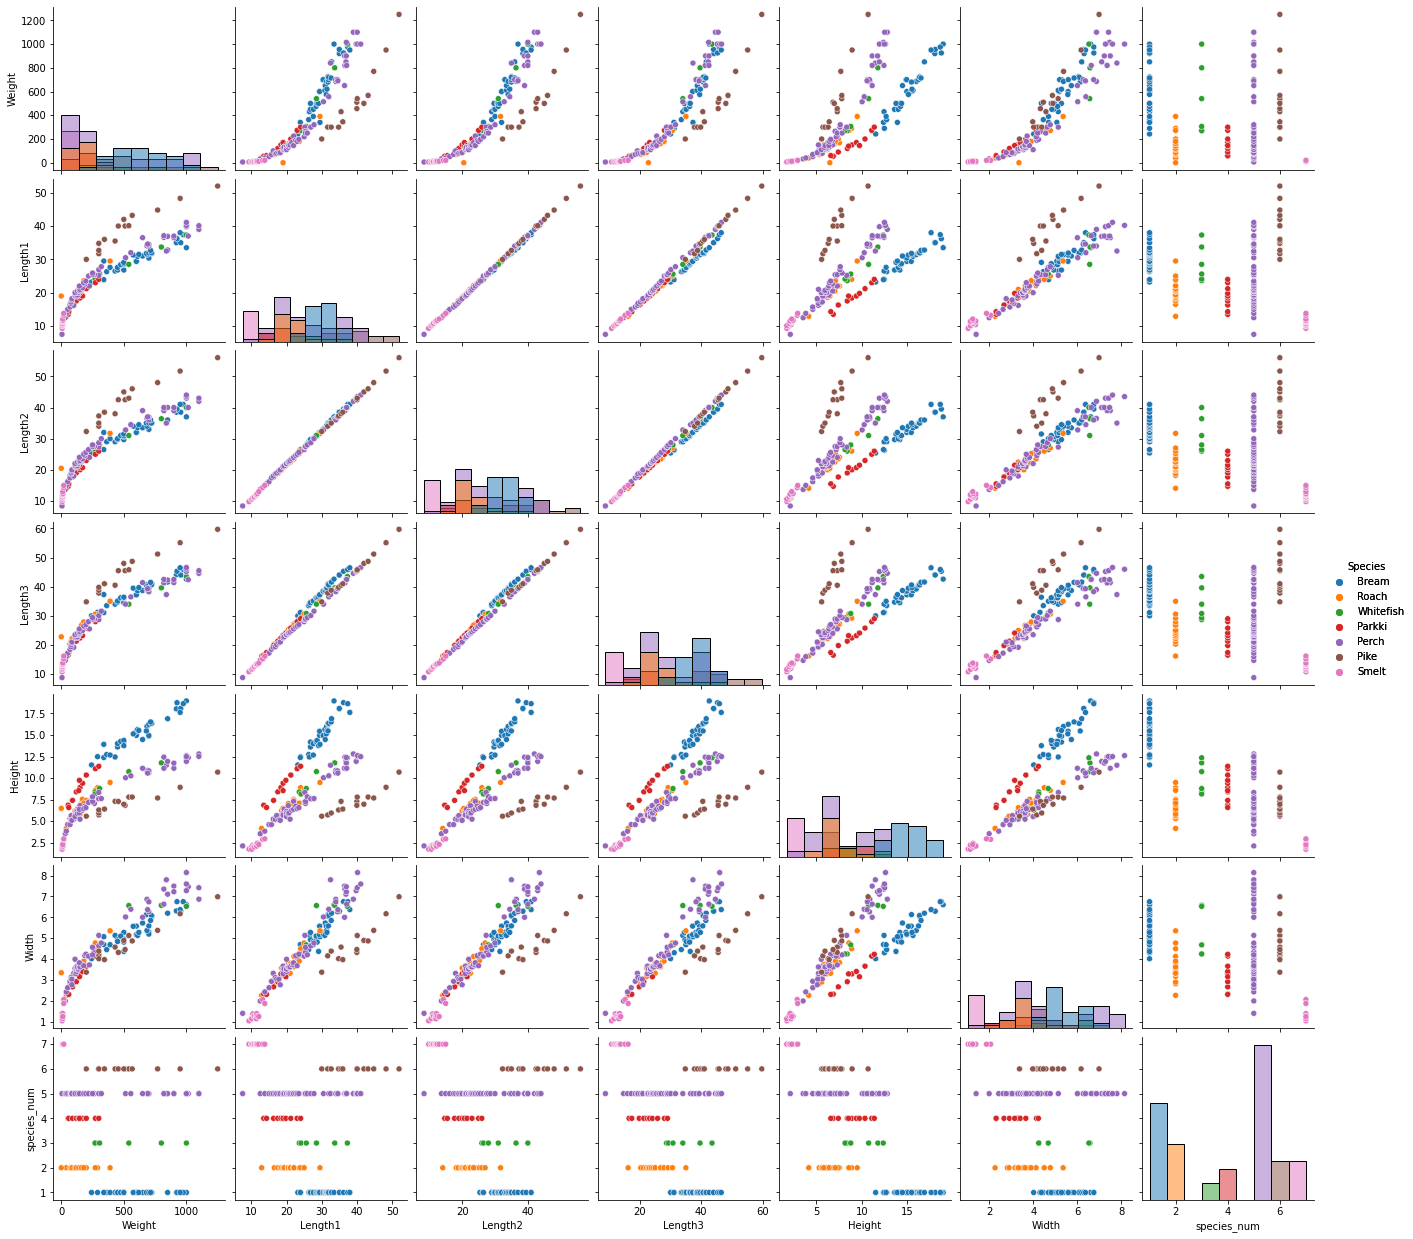

In [42]:
figure = sns.pairplot(df, hue="Species", diag_kind="hist")
figure.add_legend()

In [43]:
X = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['species_num']

In [44]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.2)

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
lsvm = svm.SVC()
lsvm.fit(X_train, y_train)

SVC()

In [47]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [48]:
lr.score(X_train, y_train)

0.9218037570879517

In [49]:
lsvm.score(X_train, y_train)

0.53125

In [50]:
clf.score(X_train, y_train)

0.90625

In [51]:
y_pred1 = lr.predict(X_test)

In [52]:
y_pred2 = lsvm.predict(X_test)

In [53]:
y_pred3 =clf.predict(X_test)

In [54]:
print("r2_score", "Model_1:", metrics.r2_score(y_test, y_pred1))
print("MSE", "Model_1:", metrics.mean_squared_error(y_test, y_pred1))

r2_score Model_1: 0.7420133286079749
MSE Model_1: 0.9709231733508268


In [55]:
print("r2_score", "Model_2:", metrics.r2_score(y_test, y_pred2))
print("MSE", "Model_2:", metrics.mean_squared_error(y_test, y_pred2))

r2_score Model_2: -0.5664195482744916
MSE Model_2: 5.895161290322581


In [56]:
print("r2_score", "Model_2:", metrics.r2_score(y_test, y_pred3))
print("MSE", "Model_2:", metrics.mean_squared_error(y_test, y_pred3))

r2_score Model_2: 0.4921457825703769
MSE Model_2: 1.9112903225806452
